## t-SNE
It is very important to understand the concept of stochastic neighbourhood embedding before getting to know about t-SNE and applying it to visualize data.


1.   What is SNE(Stochastic Neighbourhood Embedding)? It is basically mapping a higher dimensional data to low dimensional space preserving the local neighbourhood distances.  
2.   This SNE was originally proposed by Hinton and Roweis in which they used guassian distribution to map higher dimensional data to lower dimensional space preserving similarity which basically accomplished by choosing the point y as a neighbour of a point x is proportional to probability density function with point x as mean. Optimizing the [Kullback-Leibler divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) between the distribution of higher dimension space to lower dimension space. The more about this is found in the paper([Stochastic Neighbourhood Embedding](https://www.cs.toronto.edu/~fritz/absps/sne.pdf)) proposed by them.
3. The difference between SNE and t-SNE is t-SNE uses students t-distribution(fat tailed distributions) instead of guassian distribution. The more about it can be found in [Visualizing Data using t-SNE](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf)



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf

In [2]:
# Loading MNIST dataset
mnist_dataset = tf.keras.datasets.mnist.load_data()
print("The type of data : ",type(mnist_dataset))
print("Shape of 1st element of tuple : ", mnist_dataset[0][0].shape)
print("Shape of 2nd element of tuple : ", mnist_dataset[1][0].shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
The type of data :  <class 'tuple'>
Shape of 1st element of tuple :  (60000, 28, 28)
Shape of 2nd element of tuple :  (10000, 28, 28)


### Some conclusions from the above cell

1. The load_data() will give us a tuple of 2 tuples. The first tuple consists of 60000 hand written digits and second tuple consists 10000 hand written digits.   
2.   In each of two tuple, the second element is a array of target labels.

#### To display, plt.imshow() can be used.

The digit 5 is : 


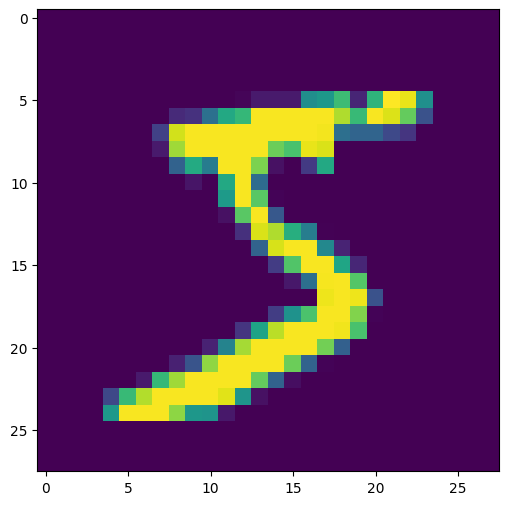

In [3]:
# sample hand written digit using imshow
plt.figure(figsize=(6,6))
print("The digit {place_holder} is : ".format(place_holder = mnist_dataset[0][1][0]))
plt.imshow(mnist_dataset[0][0][0])

The following tasks needs to be done.


1.   Each 28 X 28 2D array needs to be converted into single row in which each of 28 rows is appened one after the other contigiously so that each row will be having 784 elements
2.   After this create a dataFrame with each converted row maps to label.



In [4]:
# Converting each of 28 X 28 2D array into a single row 784 dimensions
data = np.append(mnist_dataset[0][0].reshape(60000,28*28),mnist_dataset[1][0].reshape(10000,28*28),axis=0)
print("Shape of the final data : {}".format(data.shape))
print("Sample row of converted data : {}".format(data))

Shape of the final data : (70000, 784)
Sample row of converted data : [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [5]:
# Creating a dataFrame from the above data
dataFrame = pd.DataFrame(data)
dataFrame["target"] = np.append(mnist_dataset[0][1],mnist_dataset[1][1])
dataFrame.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


#### Next steps:


1.   Standardize each and every feature such that mean of the feature is 0 and standard deviation is 1 i.e, use standard normal variate or standard scaler.
2.   Apply t-SNE using scikit learn.
3.   Draw 2D scatter plot using matplotlib or seaborn to visualize the data


In [6]:
from sklearn.preprocessing import StandardScaler
# Intialise standard scaler
standardScaler = StandardScaler()
# Fit the data
standardScaler.fit(data)
# print("Mean of the data = ",scaler.mean_)
# print("Variance of the data = ",scaler.var_)
# Transform the data
data = standardScaler.transform(data)

In [9]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
data_transformed = tsne.fit_transform(data)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 70000 samples in 0.061s...
[t-SNE] Computed neighbors for 70000 samples in 343.840s...
[t-SNE] Computed conditional probabilities for sample 1000 / 70000
[t-SNE] Computed conditional probabilities for sample 2000 / 70000
[t-SNE] Computed conditional probabilities for sample 3000 / 70000
[t-SNE] Computed conditional probabilities for sample 4000 / 70000
[t-SNE] Computed conditional probabilities for sample 5000 / 70000
[t-SNE] Computed conditional probabilities for sample 6000 / 70000
[t-SNE] Computed conditional probabilities for sample 7000 / 70000
[t-SNE] Computed conditional probabilities for sample 8000 / 70000
[t-SNE] Computed conditional probabilities for sample 9000 / 70000
[t-SNE] Computed conditional probabilities for sample 10000 / 70000
[t-SNE] Computed conditional probabilities for sample 11000 / 70000
[t-SNE] Computed conditional probabilities for sample 12000 / 70000
[t-SNE] Computed conditional probabilities for 

In [13]:
print("Shape of the transformed data : {}".format(data_transformed.shape))
# Create a dataframe with projected data
dataFrame_projected = pd.DataFrame(data_transformed)
dataFrame_projected["target"] = dataFrame["target"]
dataFrame_projected.head()

Shape of the transformed data : (70000, 2)


,0,1,target
0,1.283903,-6.516779,5
1,8.009286,0.391445,0
2,1.760856,10.229354,4
3,-5.803325,-5.748732,1
4,-1.534640,10.148232,9


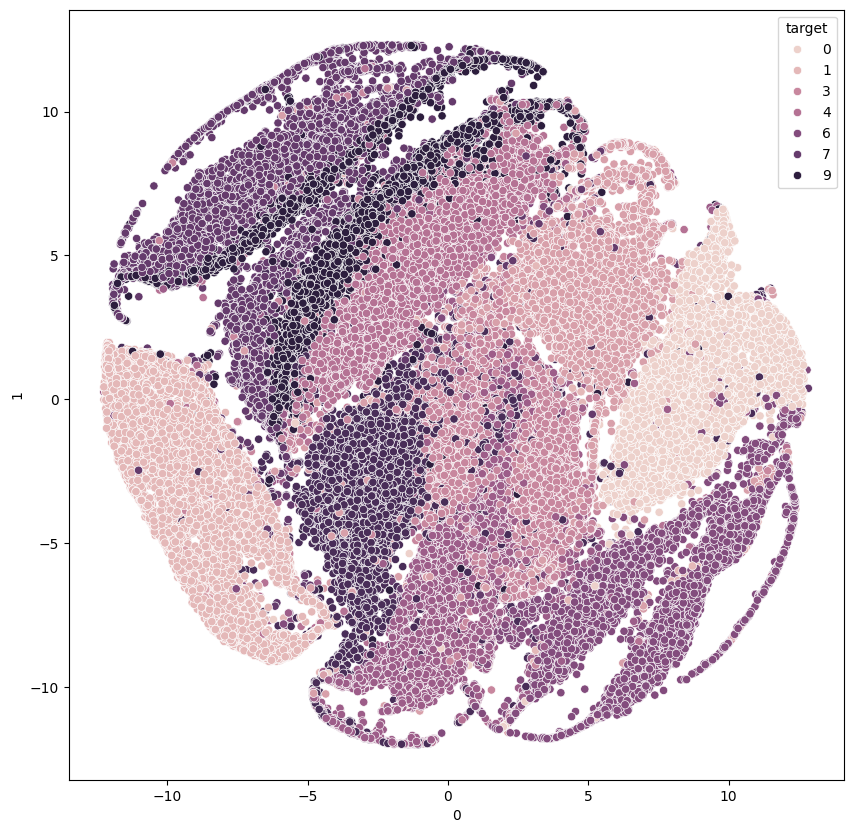

In [14]:
# plot scatter plot of above points using hue as target
plt.figure(figsize=(10,10))
sns.scatterplot(x=dataFrame_projected[0], y=dataFrame_projected[1], hue=dataFrame_projected["target"])
plt.show()